### Soynlp 소개
- 워드 세그맨테이션을 하는 패키지
- 단어장 없이 형태소에 해당하는 것을 찾아내려고 하는 패키지
- koNLPy에서 제공하는 형태소 분석기는 형태소 기반으로 문서를 토큰화할 수 있는 기능을 제공
    - 하지만 새롭게 만들어진 미등록 단어들은 인식이 잘 되지 않는 단점 가지고 있어
    - 이를 해결하기 위해서는 사용자 사전에 단어를 등록하는 절차를 거쳐야 해
- soynlp는 이러한 과정을 돕기 위해 사용자 사전과 형태소 분석 없이 cohesion 기반으로 토큰화를 할 수 있는 기능 제공

In [1]:
!pip install soynlp

     |████████████████████████████████| 416 kB 610 kB/s eta 0:00:01


#### 말뭉치 다운 https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt
- 이 파일은 하나의 문서가 한 줄로 돼 있고 각 줄 내에서 문장은 두 개의 공백으로 분리돼 있는 형식의 말뭉치
- DoublespaceLineCorpuses 클래스로 이 말뭉치를 사용할 수 있다

In [3]:
from soynlp import DoublespaceLineCorpus

# 문서 단위 말뭉치 생성
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus) # 문서의 개수

30091

In [4]:
# 앞 5개의 문서 인쇄
i = 0
for d in corpus:
    print(i, d)
    i += 1
    if i == 5:
        break

0 
1 19  1990  52 1 22
2 오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경

In [5]:
# 문장 단위 말뭉치 생성
corpus = DoublespaceLineCorpus("2016-10-20.txt", iter_sent = True) # iter_sent는 문장단위로 끊어라
len(corpus) # 문장의 개수

223357

## 단어 추출
- WordExtractor 클래스를 사용하면 형태소에 해당하는 단어를 분리하는 학습을 수행한다

In [6]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor()
word_extractor.train(corpus)

training was done. used memory 1.029 Gbse memory 0.997 Gb


- 트레인이 끝나고 나면 extract() 메서드로 각 cohesion, branching entropy, accessor variety 등의 통계 수치를 계산할 수 있다

In [7]:
# 3가지 방식으로 각기 다른 수의 단어가 추출
word_score = word_extractor.extract()

all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 360721
all accessor variety was computed # words = 360721


### Cohesion

- 문자열을 글자단위로 분리해 부분문자열(substring)을 만들 때 왼쪽부터 문맥을 증가시키면서 각 문맥이 주어졌을 때 그 다음 글자가 나올 확률을 계산하여 누적곱을 한 값이다

예를 들어 "연합뉴스가"라는 문자열이 있는 경우, 각 부분문자열의 cohesion은 다음과 같다. 한 글자는 cohesion을 계산하지 않는다.

- 𝑐𝑜ℎ𝑒𝑠𝑖𝑜𝑛(2)=𝑃(연합|연) 
- 𝑐𝑜ℎ𝑒𝑠𝑖𝑜𝑛(3)=(𝑃(연합|연)⋅𝑃(연합뉴|연합))‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾√2 
- 𝑐𝑜ℎ𝑒𝑠𝑖𝑜𝑛(4)=(𝑃(연합|연)⋅𝑃(연합뉴|연합)⋅𝑃(연합뉴스|연합뉴))‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾√3 
- 𝑐𝑜ℎ𝑒𝑠𝑖𝑜𝑛(5)=(𝑃(연합|연)⋅𝑃(연합뉴|연합)⋅𝑃(연합뉴스|연합뉴)⋅𝑃(연합뉴스가|연합뉴스))‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾√4

### Branching Entropy

- 조건부 확률의 값이 아니라 확률분포의 엔트로피값을 사용한다.
- 만약 하나의 단어를 중간에서 끊으면 다음에 나올 글자는 쉽게 예측이 가능하다
- 즉 여러가지 글자 중 특정한 하나의 글자가 확률이 높다
- 따라서 엔트로피값이 0에 가까운 값으로 작아진다.
- 하지만 하나의 단어가 완결되는 위치에는 다양한 조사나 결합어가 올 수 있으므로 여러가지 글자의 확률이 비슷하게 나오고 따라서 엔트로피값이 높아진다

### Accessor Variety

- 확률분포를 구하지 않고 단순히 특정 문자열 다음에 나올 수 있는 글자의 종류만 계산
- 글자의 종류가 많다면 엔트로피가 높아질 것이라고 추정하는 것

### L-토큰화
- 한글에만 적용할 수 있는 방식
- 한국어의 경우 공백(띄어쓰기)으로 분리된 하나의 문자열은 'L토큰 + R토큰' 구조인 경우가 많다
- 왼쪽에 오는 L 토큰은 체언(명사, 대명사)이나 동사 형용사 등이고 오른쪽에 오는 R xhzmsdms 조사, 동사, 형용사 등이다
- 여러가지 길이의 L 토큰의 점수를 비교해 가장 점수가 높은 L단어를 찾는 것이 L 토큰화다
- soynlp에서는 LTokenizer 클래스로 제공한다

### 단어장이 없어도 토큰화를 할 수 있는 패키지가 soynlp 패키지다!

# 딥러닝
## 9. RNN과 텍스트 딥러닝
### 9.1 단어 임베딩과 word2vec

- 겐심 패키지 이용
- 단어 임베딩이란 텍스트를 구성하는 하나의 단어를 수치화하는 방법의 일종
- 텍스트 분석에서 흔히 사용하는 방식은 단어 하나에 인덱스 정수를 할당하는 Bag of Words 방법
- 이 방법을 사용하면 문서는 단어장에 있는 단어의 개수와 같은 크기의 벡터가 되고 단어장의 각 단어가 그 문서에 나온 횟수만큼 벡터의 인덱스 위치의 숫자를 증가시킨다
    - 인덱스 넘버 순서에 의미가 있는 것은 아님

- 그런데 인덱스 넘버에 의미가 있는 숫자를 집어넣으면 어떨까 해서 나온 게 워드 임베딩
- 단어 임베딩은 하나의 단어를 하나의 인덱스 정수가 아니라 실수 벡터로 나타낸다.
- 단어 임베딩이 된 경우에는 각 단어 벡터를 합치거나(concatenation) 더하는(averaging, nomalized Bag of Words) 방식으로 전체 문서의 벡터 표현을 구한다

#### 신경망 이론, 간략하게
- 원래 워드임베딩하려면 신경망 이론 알아야 한다
- 입력층 - 은닉층 - 출력층
- 입력층에 벡터가 들어가고 중간에서 메이트릭스 곱을 거쳐서 은닉층이라고 하는 조그만 벡터로 바귀게 됨
- 이게 다시 어떤 행렬이랑 곱해져서 출력층 벡터가 돼서 나오는 과정이 딥러닝에서 들어가는 가장 기본적인 과정

- 신경망 이론 가지고 원래는 확률적 언어 모형을 만들려고 했다.
- 그 중에서도 바이그램 모델 만들려고 했다
    - 단어 하나 집어넣게 되면 다른 단어가 나올 확률 갖다가 계산
- BOW 인코딩한 형태의 x를 입력층에 넣으면 확률벡터가 나오는 신경망 훈련시키려 했다
- 원래 바이그램 모델은 데이터베이스에 두 개의 프라이머리 키를 가지는 데이터 레코드를 수억개 집어넣어서 만든다
- 그런데 데이터베이스를 이용하지 않고 신경망을 이용해 이런것들을 만들려는 시도를 했던 것
- 이러한 인공신경망을 훈련시키는 과정에서 단어 하나의 벡터가 결정된다. 단어의 위치가 결정된다는 것
- 인덱스가 아무 의미 없이 만들어지는 숫자가 아니라 단어의 사전적 의미 문법적 의미 사회적 지식 등이 내포된 형태로 의미가 있는 숫자가 만들어졌다는 것.
- 이걸 가지고 하면 분류작업 등에서 성능이 나아지지 않을까 생각했고 실제로도 그렇다.

### 텍스트 인공신경망 쓸 때는 항상 워드 임베딩 하는 것을 기본으로 하고 있다!

### 워드 임베딩 방법

#### CBOW(Continuous Bag of Words) Embedding
#### skip-Gram Embedding

In [8]:
import nltk
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/Im/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [9]:
from nltk.corpus import movie_reviews
sentences = [list(s) for s in movie_reviews.sents()] # 문장 단위로 나누기

In [10]:
sentences[0]

['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.']

In [11]:
from gensim.models.word2vec import Word2Vec

In [12]:
model = Word2Vec(sentences)

- 이 모형에서 두가지 메서드를 쓸 수 있다
    - similarity : 두 단어의 유사도 계산
    - most_similar : 가장 유사한 단어를 출력

In [13]:
model.wv.similarity("actor", "actress")

0.8609506

In [14]:
model.wv.similarity("he", "she")

0.87144446

In [15]:
model.wv.similarity("actor", "she")

0.25513333

In [16]:
model.wv.most_similar("accident")

[('boat', 0.8700821399688721),
 ('enemy', 0.8686642646789551),
 ('church', 0.8665390014648438),
 ('affair', 0.8653883337974548),
 ('evening', 0.8650681972503662),
 ('ball', 0.8641812801361084),
 ('museum', 0.8625195026397705),
 ('morning', 0.8577245473861694),
 ('animal', 0.8535153269767761),
 ('abode', 0.8517962694168091)]

- most_similar 메서드는 positive 인수와 negative 인수를 사용해 다음과 같은 단어 관계도 찾을 수 있다

In [17]:
model.wv.most_similar(positive = ["she", "actor"], negative = "actress", topn = 1)

[('he', 0.29278460144996643)]

# 확률론적 언어 모형

- m개의 단어열(word sequence)이 주어졌을 때 이 단어열이 실제 사용되는 문장으로서 성립될 확률을 계산해 실제로 현실에서 사용될 수 있는 문장(Sentence)인지를 판별하는 모형

- 철자 및 문법 교정(spell Correction)
- 음성 인식(Speech Recognition)
- 자동 번역(Machine Translation)
- 자동 요약(Summarization)
- 챗봇(Question-Answering)
- 작문

### 일반적 문장 확률
- 조건이 되는 확률을 문맥(context)이라고 부른다
- 단어 하나의 확률은 이 세상의 모든 문장을 담은 코퍼스로 만들고 그 안에서 해당 단어가 얼마나 등장하는가를 가지고 확률을 구할 수 있다
- 계산 용량이 너무 커져서 현실에서는 쓸 수가 없다.

### N-그램 조건부 확률
- 문맥을 이루는 단어의 수가 많으면 조건부 확률의 개수가 너무 많아짐
- 현실적으로 조건부 확률을 계산 및 저장할 수 없음
- 따라서 다음과 같은 간략화 모형을 주로 사용
    - 유니그램 모형(Unigram Model)
        - 잘 안 쓴다
    - 바이그램 모형(Bigram Model)
        - 단어의 활용이 바로 전 단어에만 의존. 바이그램 모형 또는 마코프(Markov) 모형이라고 한다

### NLTK 패키지의 바이그램 모형
- ngram 명령으로 문장을 바이그램 분해
- ConditionalFreqDist 클래스로 각 문맥별 단어 빈도 측정
- ConditionalProbDist 클래스로 조건부 확률 추정

- step1: 말뭉치 바이그램 토큰화

In [23]:
from nltk.corpus import movie_reviews
from nltk.util import ngrams

sentences = []
for tokens in movie_reviews.sents():
    bigram = ngrams(tokens, 2, pad_left = True, pad_right =  True, left_pad_symbol = "SS", right_pad_symbol = "SE")
    sentences += [t for t in bigram]
    
sentences[:17]

[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples'),
 ('couples', 'go'),
 ('go', 'to'),
 ('to', 'a'),
 ('a', 'church'),
 ('church', 'party'),
 ('party', ','),
 (',', 'drink'),
 ('drink', 'and'),
 ('and', 'then'),
 ('then', 'drive'),
 ('drive', '.'),
 ('.', 'SE')]

- step2: ConditionalFreqDist 클래스 객체 생성

In [25]:
from nltk import ConditionalFreqDist
cfd = ConditionalFreqDist(sentences)

<ConditionalFreqDist with 39769 conditions>

- 문장의 처음에 올 수 있는 단어들

In [26]:
cfd["SS"].most_common(5)

[('the', 8071), ('.', 3173), ('it', 3136), ('i', 2471), ('but', 1814)]

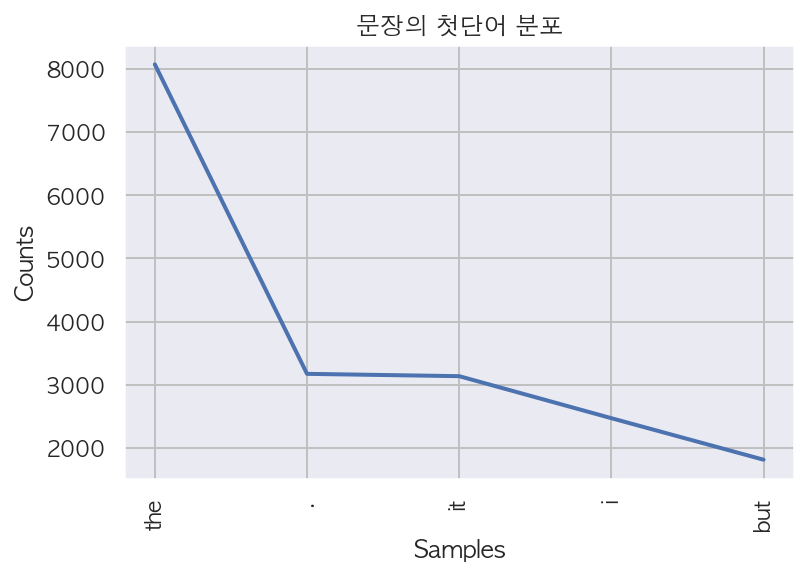

In [27]:
cfd["SS"].plot(5, title = "문장의 첫단어 분포")
plt.show()

- i 다음에 올 수 있는 단어들

In [28]:
cfd["i"].most_common(5)

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

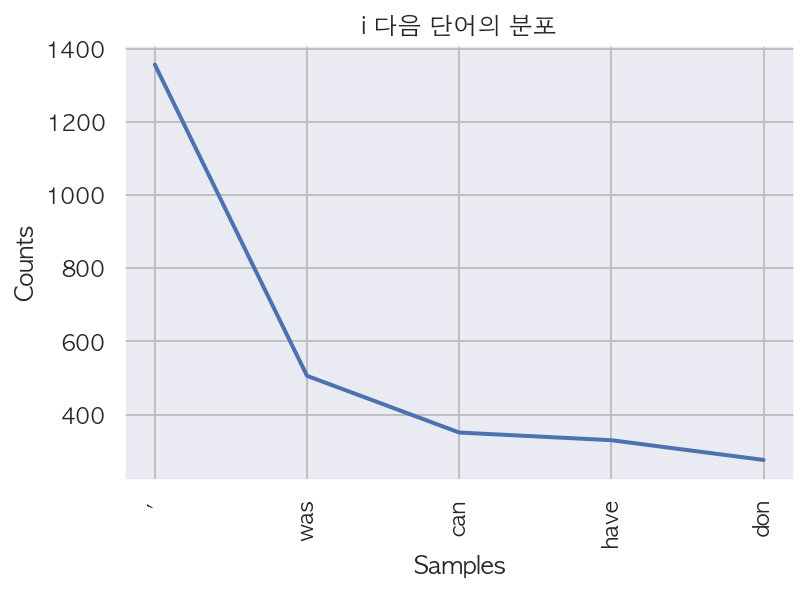

In [29]:
cfd["i"].plot(5, title = "i 다음 단어의 분포")

- step3: 조건부 확률 추정

In [32]:
from nltk.probability import ConditionalProbDist, MLEProbDist
cpd = ConditionalProbDist(cfd, MLEProbDist)
# 학습이 끝나면 조건부 확률의 값을 보거나 샘플 문장을 입력해서 문장의 로그 확률을 구할 수 있다

In [37]:
# i 다음에 am이 올 확률
cpd["i"].prob("am")

0.018562267971650354

In [38]:
# 1.8%는 문장 확률에서 굉장히 높은 확률

In [39]:
cpd["i"].prob("is")

0.0002249971875351558

In [40]:
cpd["we"].prob("are")

0.08504504504504505

In [41]:
cpd["we"].prob("is")

0.0

In [ ]:
# i, we는 문맥

- step4: 문장 확률 계산

- 조건부 확률을 알게 되면 각 문장의 확률을 구할 수 있다
- 다음으로 이 토큰열을 N-그램형태로 분해한다. 
- 바이그램 모형에서는 전체 문장의 확률은 다음과 같이 조건부 확률의 곱으로 나타낸다.

In [49]:
# 문장확률계산의 경우 따로 명령어가 있는 것은 아님
def sentence_score(s):
    p = 0.0
    for i in range(len(s) - 1):
        c = s[i]
        w = s[i + 1]
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps)
        # 한번도 사용되지 않은 조합이 들어가면 0이 나오게 되는데 로그0는 에러가 날 수 있으므로 실수에서 사용할 수 있는 가장 작은 수를 하나 집어넣은 것 
    return np.exp(p)

In [44]:
# 말이 되는 문장
test_sentence = ["i", "like", "the", "movie", "."]
sentence_score(test_sentence)

2.740764134071561e-06

In [47]:
# 말이 안 되는 문장
test_sentence = ["like", "i", "the", ".", "movie"]
sentence_score(test_sentence)

1.5015040140827832e-38

- step5: 무작위 문장 생성

In [53]:
def generate_sentence(seed=None):
    if seed is not None:
        import random
        random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
        w = cpd[c].generate()
        
        if w == "SE":
            break
        else:
            w2 = w
        
        if c == "SS":
            sentence.append(w2.title())
        else:
            sentence.append(" " + w2)
            
        c = w
    return "".join(sentence)

In [54]:
# 컨텍스트가 정해지면 그 다음 단어의 확률이 정해진다

In [58]:
generate_sentence(1)

'There to receive a vacation " dead spots .'

# 2. 이미지 데이터 전처리

## 2.1 이미지 처리 기초

- 픽셀: 작은 단색의 이미지 직사각형
    - 세로 * 가로
- 색공간: 픽셀의 색을 숫자로 표현하는 방식
    - 그레이 스케일(gray scale), RGB(Red-Green-Blue), HSV(Hue-Saturation-Value) 방식

### 그레이 스케일
- 모든 색이 흑백. 각 픽셀은 명도를 나타내는 숫자로 표현.
- 0은 검은색을 나타내고 숫자가 커질수록 명도가 증가해 하얀색이 된다.
- 숫자는 보통 0~255의 8비트 부호없는 정수로 저장

In [61]:
import scipy as sp

img_gray = sp.misc.face(gray = True) # 사이파이 내 예제 이미지 로드
img_gray.shape

(768, 1024)

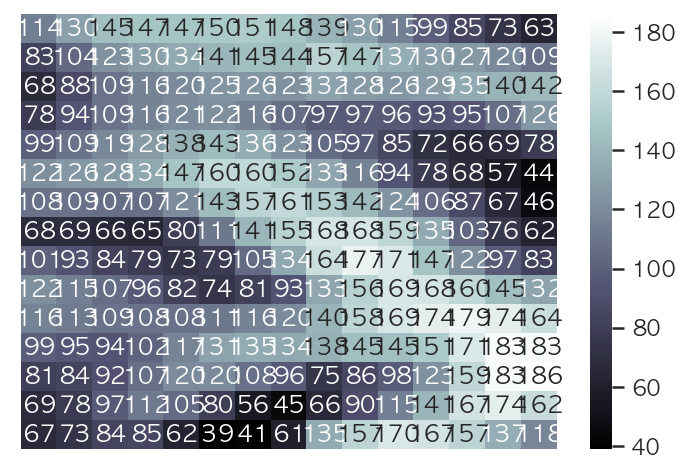

In [64]:
import matplotlib.pylab as plt
import seaborn as sns

sns.heatmap(img_gray[:15, :15], annot = True, fmt = "d", cmap = plt.cm.bone)
plt.axis("off")
plt.show()

In [65]:
# 숫자가 크면 명도가 높다

## RGB

- RGB 색공간에서 색은 적(Red), 녹(Green), 청(Blue) 3가지 색의 명도를 뜻하는 숫자 3개가 합쳐진 명도로 표현
- 8비트 부호없는 정수를 사용하는 경우 (255, 0, 0)은 빨간색, (0, 255, 0)은 녹색, (0, 0, 255)는 파란색이다
- 픽셀 데이터가 스칼라가 아닌 벡터이므로 이미지 데이터는 (세로픽셀수 * 가로 픽셀수) 형태의 2차원 배열로 표현하지 못하고 (세로픽셀수 *가로픽셀수 * 색채널) 형태의 3차원 배열로 저장한다.
    - 세번째 축을 색채널이라고 부른다.

## HSV

- 색상(HUE): 색상값 H는 가시광선 스펙트럼을 주파수 별로 고리모양으로 배치했을 때의 각도
    - 0~360도 범위의 값을 갖고 360도와 0도는 빨강을 가리킨다
- 채도(Saturation): 채도값 S는 특정한 색상의 진함의 정도를 나타낸다. 가장 진한 상태를 100%, 0%는 같은 명도의 무채색이다
- 명도(Value): 명도값 V는 밝은 정도를 나타낸다. 순수한 흰색, 빨간색은 100%이고, 검은색은 0%이다

- HSV 색공간으로 표현된 파일은 imshow 명령으로 바로 볼 수 없다

- 이외에도 RGB, HSV 색공간에 투명도(transparency)를 표현하는 A(Alpha) 채널이 추가된 RGBA, HSVA 등의 색공간도 있다

## 이미지 파일 형식
- jpeg : 투명 이미지 지원 안 함, 압축을 위한 파일, 압축 많이 하면 화질 떨어질 수 있다
- Gif: 투명, 애니메이션 지원, 8비트 256컬러로 제한
- png : 비손실 압축 방식, jpg, gif보다 용량 크고 애니메이션 만들 수 없다

## Pillow를 이용한 이미지 처리

In [69]:
import PIL

In [70]:
from PIL import Image
img_logo_png = Image.open("jjang.jpg")
img_logo_png.size

(700, 605)

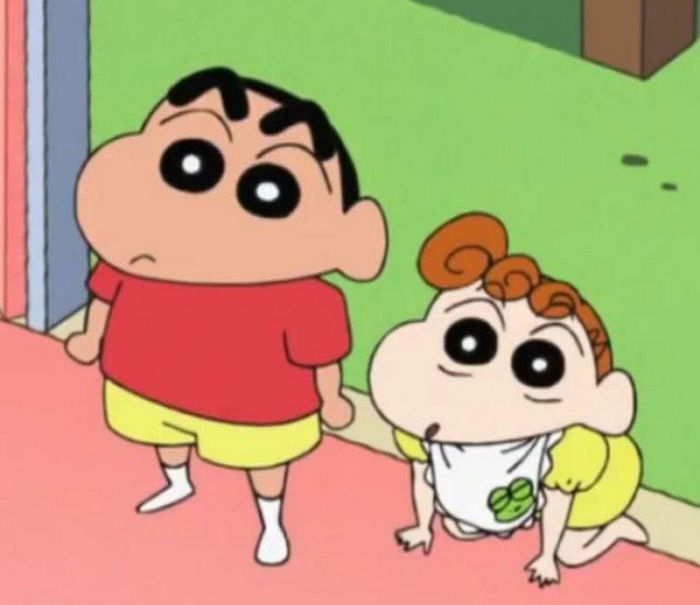

In [71]:
img_logo_png

In [72]:
#img_logo_png.save("jjang.jpg") # 이미지 저장
#img_logo_bmp = Image.open("jjang.jpg") # 이미지 불러오기

- 이미지 데이터 처리를 위해 Image 클래스 객체를 Numpy 배열로 변환할 때는 np.array 함수를 사용
- Numpy 배열이 되면 matplotlib의 imshow 명령으로 볼 수 있다

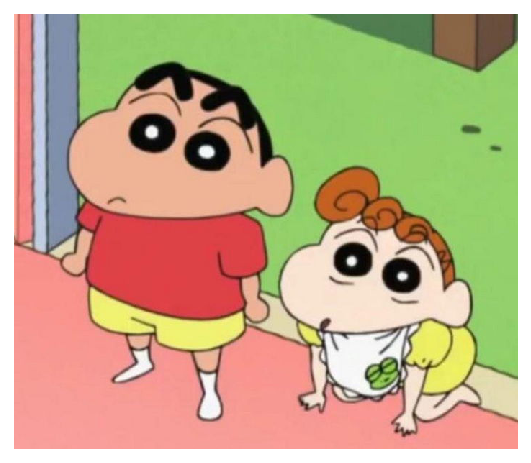

In [75]:
img_logo_array = np.array(img_logo_png)

plt.imshow(img_logo_png)
plt.axis("off")
plt.show()

- 반대로 Numpy 배열을 Image 객체로 바꿀 때는 fromarray 클래스 메서드를 사용

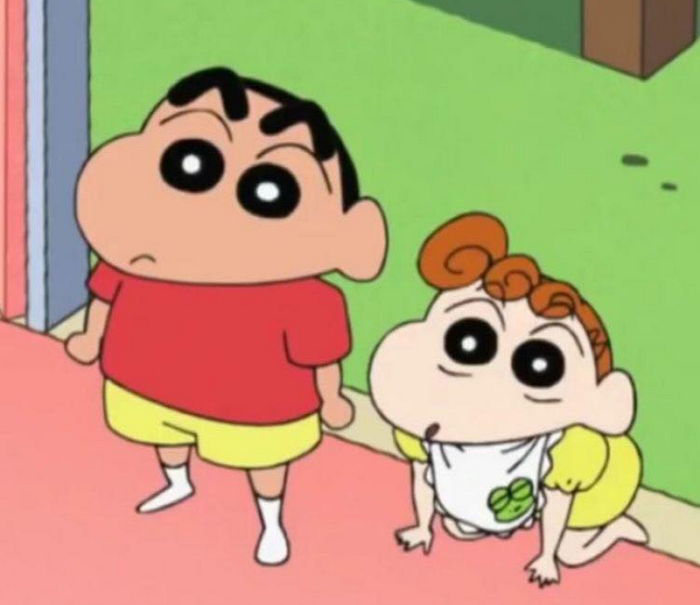

In [76]:
Image.fromarray(img_logo_array)

### 이미지 크기 변환

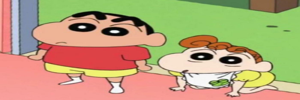

In [82]:
img_logo_png2 = img_logo_png.resize((300, 100))
img_logo_png2

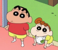

In [85]:
# 섬네일 메소드
# 리사이즈와는 달리 원래 객체 자체를 바꾸는 인플레이스(in-place) 메소드이므로 주의해 사용
img_logo_thumbnail = img_logo_png.copy()
img_logo_thumbnail.thumbnail((150, 50))
img_logo_thumbnail

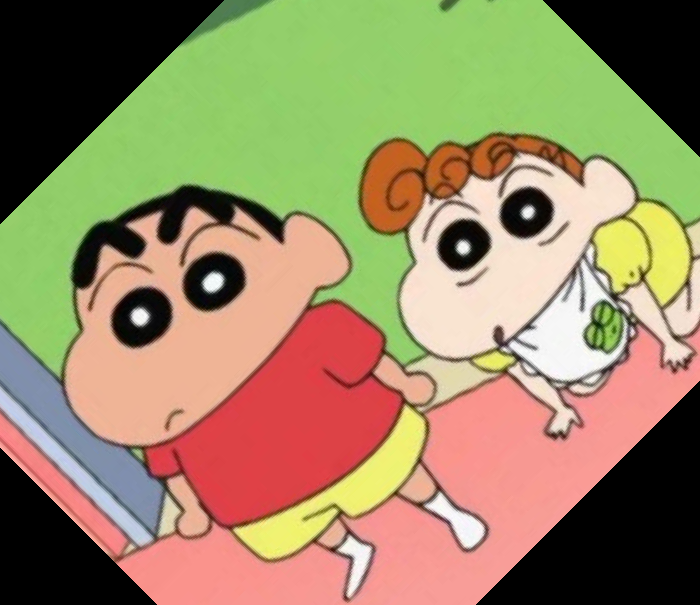

In [87]:
img_logo_rotated = img_logo_png.rotate(45)
img_logo_rotated

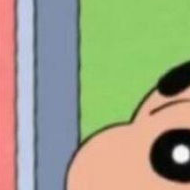

In [90]:
img_logo_cropped = img_logo_png.crop((10, 10, 200, 200)) # 좌상단, 우하단의 좌표
img_logo_cropped

## 사이킷 이미지
- OpenCV에서 사이킷 이미지 모든 기능 거의 다 쓸 수 있어서 잘 안 쓴다

### 사이킷 이미지의 샘플 이미지

In [91]:
import skimage.data

img_astro = skimage.data.astronaut()
img_astro.shape

(512, 512, 3)

In [97]:
skimage.io.imsave("astronaut.png", img_astro)
img_astro2 = skimage.io.imread("astronaut.png")

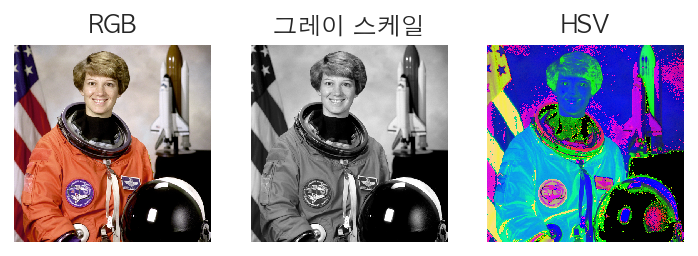

In [93]:
from skimage import color

plt.subplot(131)
plt.imshow(img_astro)
plt.axis("off")
plt.title("RGB")

plt.subplot(132)
plt.imshow(color.rgb2gray(img_astro), cmap = plt.cm.gray)
plt.axis("off")
plt.title("그레이 스케일")

plt.subplot(133)
plt.imshow(color.rgb2hsv(img_astro))
plt.axis("off")
plt.title("HSV")
           
plt.show()

## OpenCV
- 이미지, 비디오 프로세싱에서 가장 많이 쓰이는 패키지
- C로 만들어져 있음
- feature_extraction 중에 일부 기능은 오픈소스 라이센스가 아님. 직접 빌드해서 써야 하는데 사실상 어렵다

In [96]:
!pip install opencv-python

     |████████████████████████████████| 49.1 MB 291 kB/s eta 0:00:013   |██████▏                         | 9.4 MB 3.7 MB/s eta 0:00:11     |████████████████████████████    | 43.0 MB 323 kB/s eta 0:00:19


In [99]:
import cv2
cv2.__version__

'4.2.0'

In [100]:
#### 파일 읽고 쓰기
img_astro3 = cv2.imread("astronaut.png")
img_astro3.shape

(512, 512, 3)

#### OpenCV도 이미지 데이터를 넘파이 배열로 저장하지만 색 채널의 순서가 R-G-B순서가 아닌 B-G-R 순서로 뒤바뀌어 있음

In [101]:
# 각 채널을 분리
b, g, r = cv2.split(img_astro)

# b, r을 서로 바꿔서 머지
img_astro3 = cv2.merge([r, g, b])

## 2.1 이미지 필터링

In [104]:
# 아 이런 알고리즘이 존재하는구나 정도로

- 여러 수식을 이용해 이미지 이루고 있는 픽셀 행렬을 다른 값으로 바꿔 이미지 변형

### 임계처리

- 임계처리(thresholding)는 이미지 행렬에서 하나의 픽셀값을 사용자가 지정한 기준값(threshold)을 사용해 이진화하는 가장 단순한 필터
- OpenCV에서는 threshold 함수로 구현
- 경계선 추출을 위해 한다. 컨투어링에서 쓴다

- 0으로 갈수록 검은색, 255로 갈수록 하얀색

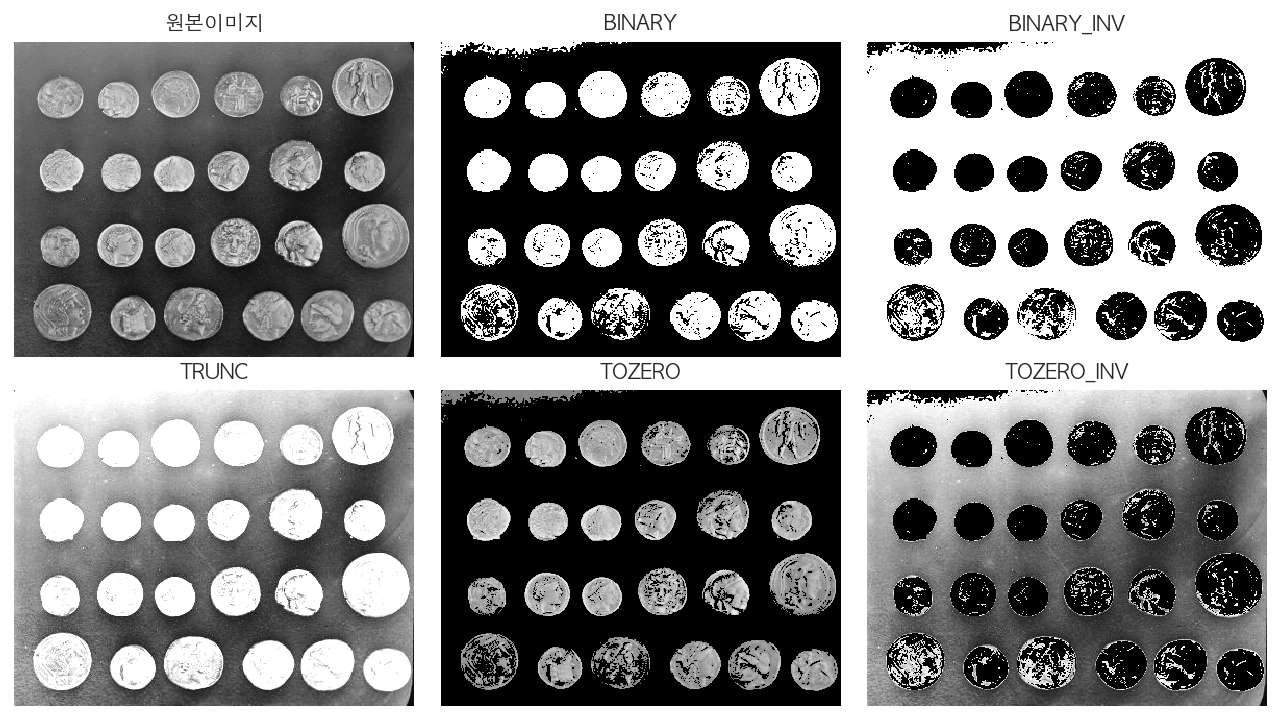

In [117]:
import cv2
from skimage.data import coins

img = coins()

maxval = 255
thresh = maxval / 2

_, thresh1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV)

titles = ['원본이미지', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(9, 5)) # 이미지 사이즈 조절, (9, 5)는 인치 단위
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    # subplot( m , n , p ) 는 현재 Figure를 m x n 그리드로 나누고, p 로 지정된 위치에 좌표축을 만든다
    plt.title(titles[i], fontdict={'fontsize': 10})
    plt.axis('off')

plt.tight_layout(pad=0.7)
plt.show()

### 적응임계처리
- 임계처리의 경우는 이미지 전체에 하나의 기준을 적용
- 적응임계처리는 일정한 영역 내의 이웃한 픽셀들의 값들을 이용해 해당 영역에 적용할 기준값을 자체적으로 계산한다
- OpenCV에서는 adaptivThreshold 함수로 구현돼 있다
- 평균적응임계처리, 가우시안블러 적응임계처리
    - OCR(Optical Character Reading)이라고 하는 그림에서 글자 있는 작업에서 훨씬 더 잘 읽히게 될 것.

### 이미지 필터링
- 이미지 필터링은 필터 또는 커널 또는 윈도우라고 하는 정방행렬을 정의하고 이 커널을 이동시키면서 같은 이미지 영역과 곱하여 그 결과값을 이미지의 해당 위치의 값으로 하는 새로운 이미지를 만드는 연산이다
- 주변 값들을 평균 내서 값을 얻는다
- 이미지 콘볼루션은 사실상 필터링과 같은 개념이다. 다만 필터를 좌우 상하로 뒤집은 것
- 가중치를 곱하는 위치를 변화시키는 것을 스캐닝, 스트라이딩(striding)이라고 한다.
    - 이미지가 뭉개진다, 블러 처리 느낌(가중치 달리하면 선명해지는 경우도 있다)
    - 가장자리는 패딩이라고 가짜 이미지(흰색, 타일식, 미러링)등 사용해 필터링 한다

### 블러
- 필터링 중에서 뭉개는 필터링을 따로 블러라고 부른다
- 이미지 필터링을 사용해 이미지를 흐리게 만드는 것
- 노이즈를 제거하거나 경계선을 흐리게 하기 위해 쓴다(포토샵 잡티 없애주는 기능)
    - 평균 블러
    - 중앙값 블러(점 없앨 때)
    - 가우시안 블러(넓은 영역 블러할 때, 이미지 전체 걸쳐 평균, 완전히 다 뭉개진다)
    - 양방향 블러
        - 가우시안 필터링을 쓰면 이미지의 경계선도 흐려진다.
        - 양방향 필터링(Bilateral Filtering)은 두 픽셀과 거리 뿐 아니라 두 픽셀의 명암값의 차이도 커널에 넣어서 가중치로 곱한다
        - 값이 비슷한 애들끼리는 뭉개는데 확 차이나는 애들끼리는 안 뭉개는 방식으로
        - 경계선 살리면서 내부 영역만 뭉개는 것

### 형태학적 변환(morphological region)이라고 부르는 필터링
- 이진화한 이미지에서는 같은 값을 가진 픽셀이 이웃하여 있으면 이를 형태학적 영역으로 생각할 수 있다
- 이미지의 형태학적 변환은 이미지 필터링을 사용해 영역을 변화시키는 방법이다
- 필터링처럼 커널은 사용하는데 결과는 이진화

#### 침식(erode) 기법
- 각 픽셀에 커널을 적용해 커널 영역 내의 최소값으로 해당 픽셀을 대체한다
- 더 어둡게 만든다
- 이진화된 이미지에서는 0인 영역이 증가한다, 어두운 부분이 더 어두워진다
#### 팽창(Dilation) 기법
- 침식과 반대로 커널 영역 내의 최대값으로 해당 픽셀을 대체. 밝아진다
#### 혼합형 : 그레디언트, 오프닝, 클로징
- 침식과 팽창을 섞은 것
- 그레디언트는 팽창으로 확장시킨 영역에서 침식으로 축소시킨 영역을 빼서 윤곽선을 파악하는 것
    - 그러면 윤곽선이 만들어진다
- 오프닝은 침식을 적용한 뒤 팽창을 적용하는 것. 영역이 점점 둥글게 되므로 점 잡음, 작은 물체, 돌기 등을 제거하는 데 적절
- 클로징은 반대로 팽창을 적용한 뒤 침식을 적용해 영역이 비슷한 영역끼리 붙기 때문에 전체적인 윤곽을 파악하는 데 적합.

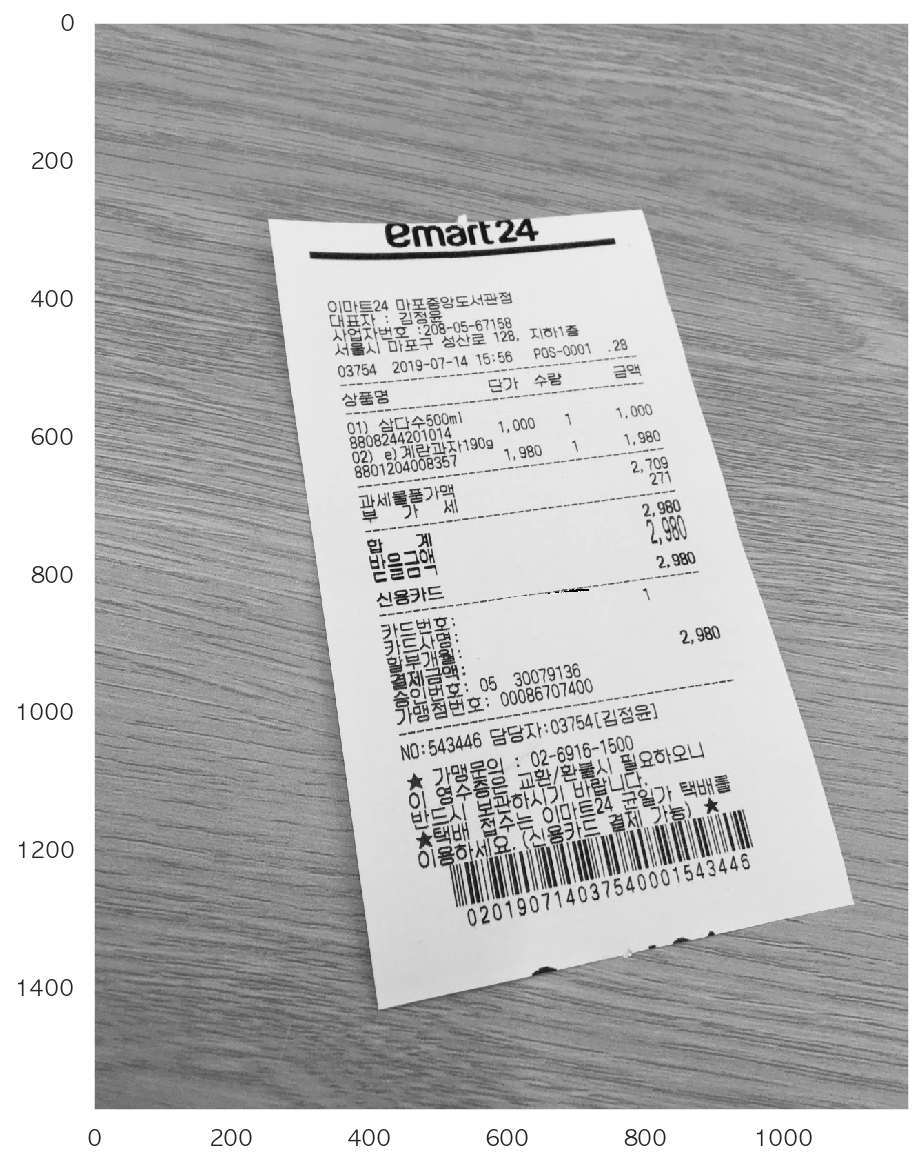

In [281]:
import cv2

img_receipt = cv2.imread("receipt.png")
img_receipt1 = cv2.cvtColor(img_receipt, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 10))
plt.imshow(img1, cmap = plt.cm.gray)
plt.grid(False)
plt.show()

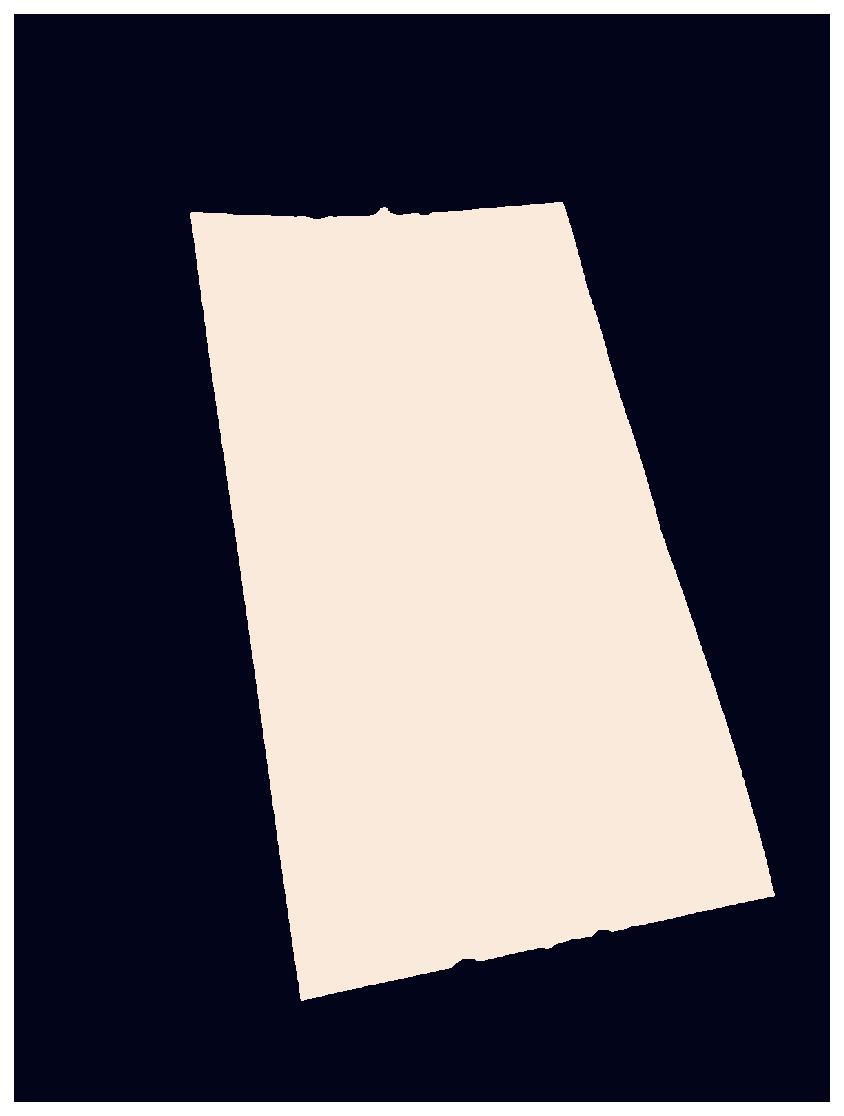

In [282]:
maxval = 255
thresh = maxval - 50
#ksize = (30, 30)
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)

plt.figure(figsize =(10, 10))
plt.axis("off")
_, thresh1 = cv2.threshold(img1, thresh, maxval, cv2.THRESH_BINARY) # thresholding
#erosion = cv2.dilate(img_denoise, kernel) # Dilation 팽창
closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30)) # 클로징 
                          )
img_denoise = cv2.medianBlur(closing, 3) # 중간값 Blur
plt.imshow(img_denoise)

# 이미지 컨투어

- 컨투어란 동일한 색 또는 동일한 픽셀값(강도, intensity)을 가지고 있는 영역의 경계선 정보
- 물체의 윤곽선 외형을 파악하는 데 사용된다
    - 파라미터 mode(컨투어를 찾는 방법)의 디폴트 값은 cv2.RETR_TREE(모든 컨투어 라인을 찾고, 모든 상하구조를 구성함)
    - method(컨투어를 찾을 때 사용하는 근사화 방법)는 cv2.CHAIN_APPROX_TC89_KCOS 많이 쓴다

In [283]:
import cv2
from skimage.data import horse

img_raw = horse().astype('uint8')
img_raw = np.ones(img_raw.shape) - img_raw

img = img_raw.copy().astype('uint8')

contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
#images, contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
# OpenCV 3점대 버전은 맨 앞 images가 들어간다
# contours에 가장 핵심 정보가 들어가 있다. 튜플의 리스트의 리스트 형태

In [284]:
len(contours)

2

In [285]:
# 두 개의 컨투어 라인이 잡혔다는 것

In [286]:
np.squeeze(contours[0])[:5]
# 컨투어 포인트 정보

array([[350,   9],
       [346,  13],
       [345,  13],
       [339,  19],
       [330,  20]], dtype=int32)

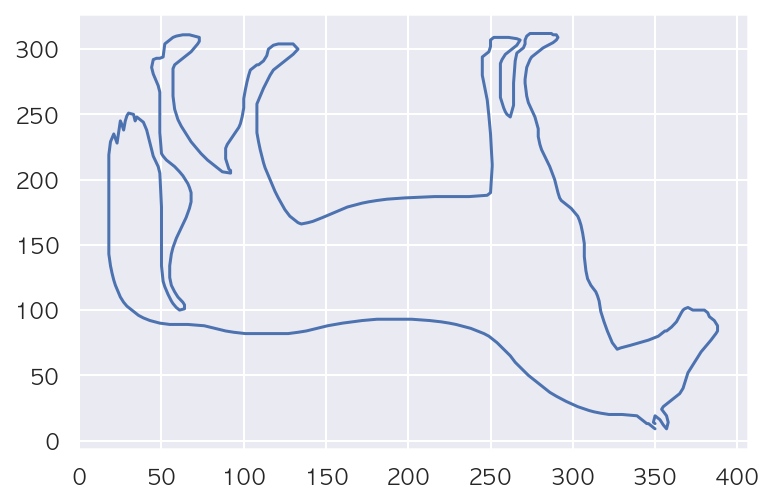

In [287]:
x0, y0 = zip(*np.squeeze(contours[0]))
plt.plot(x0, y0, c = "b")
plt.show()

- 상하구조(hierarchy): 컨투어가 여러개 있을 때 생기는 정보
    - 컨투어 라인은 등고선
    - 1, 0, -1 값으로 이루어진 (컨투어 수 * 4) 크기의 행렬
    - 1번 원소: 같은 수준의 다음 컨투어의 인덱스. 같은 수준의 다음 컨투어가 없으면 -1
    - 2번 원소: 같은 수준의 이전 컨투어의 인덱스. 같은 수준의 이전 컨투어가 없으면 -1
    - 3번 원소: 하위 자식 컨투어의 인덱스. 가장 하위의 컨투어면 -1
    - 4번 원소: 부모 컨투어의 인덱스. 가장 상위의 컨투어면 -1
    
    - 컨투어라인 많으면 상하구조 살펴보거나 그려봐서 구분하면 됨

### 컨투어 특징
#### 이미지 모멘트
- 이미지 모멘트는 컨투어에 관한 특징값을 뜻한다
- 이미지 모멘트는 컨투어에 관한 특징값을 뜻한다. OpenCV에서는 moments 함수로 이미지 모멘트를 구한다. 컨투어 포인트 배열을 입력하면 해당 컨투어의 모멘트를 딕셔너리 타입으로 반환한다. 반환하는 모멘트는 총 24개로 10개의 위치 모멘트, 7개의 중심 모멘트, 7개의 정규화된 중심 모멘트로 이루어져 있다.
    - Spatial Moments : M00, M01, M02, M03, M10, M11, M12, M20, M21, M30
    - Central Moments : Mu02, Mu03, Mu11, Mu12, Mu20, Mu21, Mu30
    - Central Normalized Moments : Nu02, Nu03, Nu11, Nu12, Nu20, Nu21, Nu30

In [288]:
c0 = contours[0]
M = cv2.moments(c0)
M

{'m00': 42355.0,
 'm10': 7943000.166666666,
 'm01': 6115675.833333333,
 'm20': 1914995009.1666665,
 'm11': 1043128904.8333333,
 'm02': 1041817606.0,
 'm30': 517465951777.85004,
 'm21': 233874687443.69998,
 'm12': 169430720481.3,
 'm03': 200904428563.85,
 'mu20': 425412866.6175771,
 'mu11': -103767899.87557864,
 'mu02': 158769774.61250484,
 'mu30': -1219318387.8395386,
 'mu21': -3713125246.697487,
 'mu12': 4020833974.2852783,
 'mu03': 4625649126.278534,
 'nu20': 0.2371380524771235,
 'nu11': -0.0578433790256196,
 'nu02': 0.08850309451896964,
 'nu30': -0.003302595676372647,
 'nu21': -0.010057218449154588,
 'nu12': 0.010890665663146169,
 'nu03': 0.012528843128440374}

In [289]:
# 컨투어의 면적은 모멘트의 m00 값이고, cv2.contourArea() 함수로도 구할 수 있다.

In [290]:
cv2.arcLength(c0, closed=True), cv2.arcLength(c0, closed=False)
# 컨투어의 둘레는 arcLength 함수로 구할 수 있다. 두번째 파라미터인 closed의 의미는 폐곡선의 여부로, 설정한 값이 True 일 때는 컨투어의 시작점과 끝점을 이어 도형을 구성하고 그 둘레 값을 계산한다. False인 경우 시작점과 끝점을 잇지 않고 둘레를 계산한다.

(2203.678272008896, 2199.678272008896)

In [415]:
import cv2

img_raw = img_denoise
img = img_raw.copy()

contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

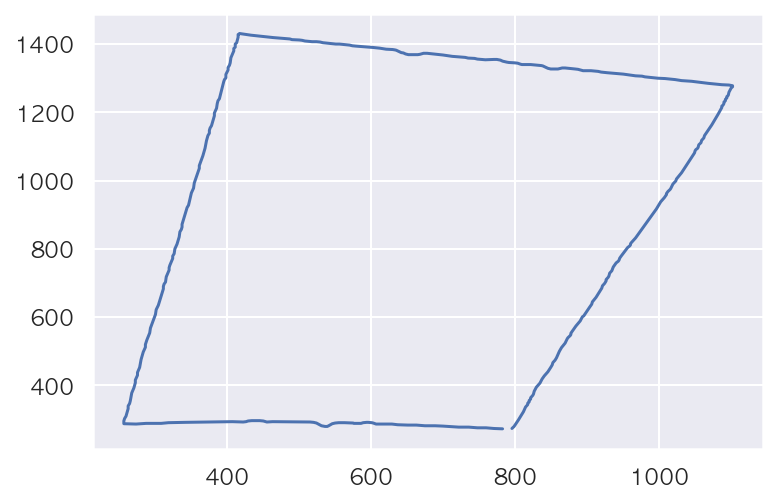

In [418]:
x0, y0 = zip(*np.squeeze(contours[2]))
plt.plot(x0, y0, c = "b")
plt.show()

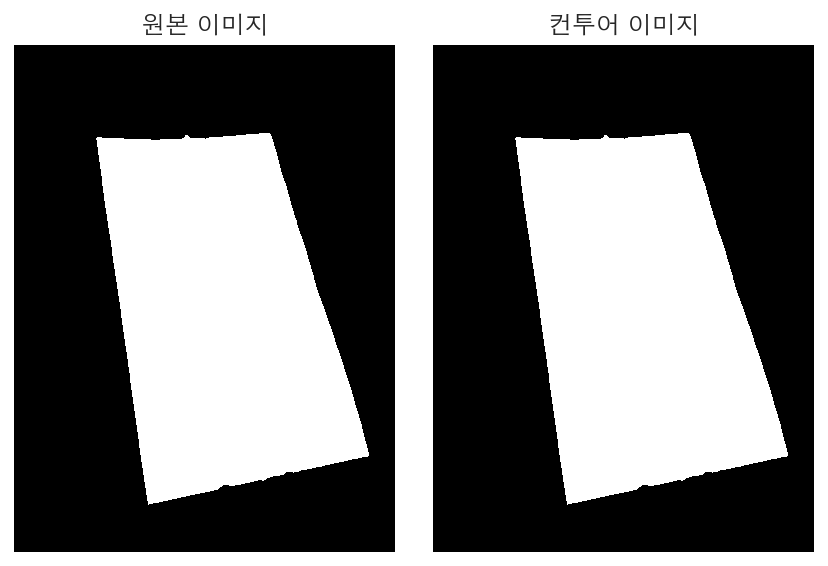

In [419]:
image = cv2.drawContours(img, contours, 0, 2)

plt.subplot(1, 2, 1)
plt.imshow(img_raw, cmap='bone')
plt.title("원본 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap='bone')
plt.title("컨투어 이미지")
plt.axis('off')
plt.tight_layout()
plt.show()

In [427]:
c2 = contours[2]
M = cv2.moments(c0)
M

{'m00': 676182.0,
 'm10': 435427404.0,
 'm01': 572623906.8333333,
 'm20': 305296499261.0,
 'm11': 379710151940.5833,
 'm02': 549165906380.0,
 'm30': 229406169333025.8,
 'm21': 273262007293760.47,
 'm12': 370833291351791.25,
 'm03': 572207276972271.0,
 'mu20': 24903019171.05493,
 'mu11': 10968982816.329529,
 'mu02': 64240045181.28436,
 'mu30': 737887565196.2812,
 'mu21': 595083930163.6602,
 'mu12': -1380237799974.2188,
 'mu03': -1656413727419.25,
 'nu20': 0.054465913453656103,
 'nu11': 0.023990491459897022,
 'nu02': 0.1405007447920048,
 'nu30': 0.0019625972122348455,
 'nu21': 0.0015827750967375171,
 'nu12': -0.003671088911398029,
 'nu03': -0.0044056481191356075}

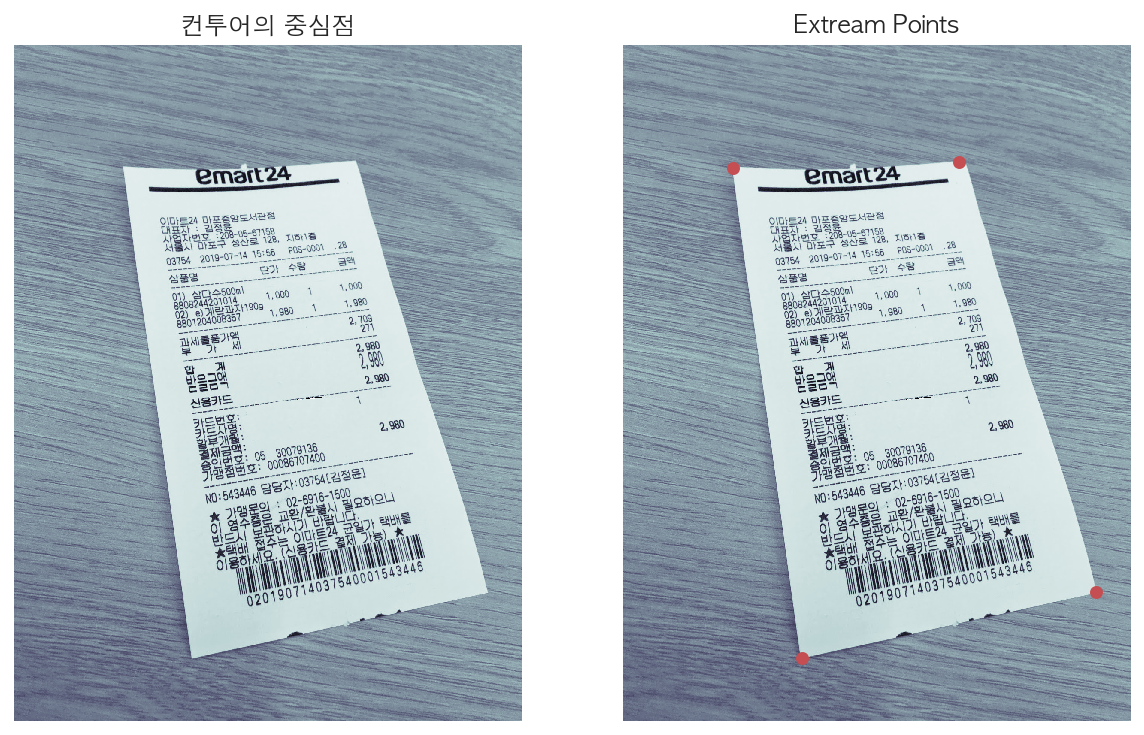

In [432]:
leftmost = tuple(c2[c2[:, :, 0].argmin()][0])
rightmost = tuple(c2[c2[:, :, 0].argmax()][0])
topmost = tuple(c2[c2[:, :, 1].argmin()][0])
bottommost = tuple(c2[c2[:, :, 1].argmax()][0])

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_receipt1, cmap='bone')
plt.title("컨투어의 중심점")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_receipt1, cmap='bone')
plt.axis("off")
plt.scatter(
    [leftmost[0], rightmost[0], topmost[0], bottommost[0]], 
    [leftmost[1], rightmost[1], topmost[1], bottommost[1]], 
    c="r", s=30)
plt.title("Extream Points")

plt.show()

### 컨투어 추정

- Douglas-Peucker 알고리즘을 이용해 컨투어 포인트의 수를 줄여 실제 컨투어 라인과 근사한 라인을 그릴 때 사용